In [3]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [11]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
end_date = '2024-05-24'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 8)


df = yf.download(tickers = symbols_list, start = start_date, end = end_date)
df

[*********************100%%**********************]  503 of 503 completed


Price        Adj Close                                                 \
Ticker               A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2016-05-26   42.705772  30.281843   23.056311   43.867573         NaN   
2016-05-27   42.996677  30.416384   23.042528   44.441601         NaN   
2016-05-31   43.062363  30.666254   22.930016   44.597504         NaN   
2016-06-01   43.118671  30.704697   22.608545   44.526642         NaN   
2016-06-02   43.071732  30.435612   22.438627   46.128262         NaN   
...                ...        ...         ...         ...         ...   
2024-05-17  154.229996  14.730000  189.869995  166.419998  145.660004   
2024-05-20  154.639999  14.520000  191.039993  164.559998  146.369995   
2024-05-21  153.669998  14.030000  192.350006  162.929993  144.100006   
2024-05-22  152.869995  14.100000  190.899994  159.610001  142.710007   
2024-05-23  150.550003  13.820000  186.880005  158.259995  141.039993   

Price                                                                   ...  \
Ticker             ABT        ACGL         ACN        ADBE         ADI  ...   
Date                                                                    ...   
2016-05-26   33.566113   23.956667  104.416924   99.370003   49.980892  ...   
2016-05-27   33.919998   24.053333  104.884293  100.139999   50.109509  ...   
2016-05-31   34.204823   24.219999  104.910736   99.470001   50.160946  ...   
2016-06-01   34.092621   24.170000  104.946014  100.040001   50.289577  ...   
2016-06-02   34.118515   24.223333  105.148842  100.169998   49.972313  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-17  104.089996  100.989998  303.589996  483.429993  214.080002  ...   
2024-05-20  103.209999  100.169998  305.700012  484.690002  217.479996  ...   
2024-05-21  102.959999  101.650002  303.640015  481.850006  216.639999  ...   
2024-05-22  104.820000  102.699997  307.109985  483.929993  240.160004  ...   
2024-05-23  104.230003  101.930000  305.929993  483.309998  234.559998  ...   

Price        Volume                                                         \
Ticker          WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                         
2016-05-26   627000  3306300  1974700  2465600   7867900   762800  3582799   
2016-05-27   722500  2887500  1598000  2136400   7505900  1141500  2552207   
2016-05-31  1384200  6074300  2139100  4784400  13178800  1256400  6090354   
2016-06-01   441500  3096300  2100500  2541600   7994800   995300  3609923   
2016-06-02   423600  3071100  2985400  2222700   9837500  1007100  2827903   
...             ...      ...      ...      ...       ...      ...      ...   
2024-05-17   297900  4469400  1072600  4092800  15104500  2306300  1346400   
2024-05-20   324900  4510700  1182200  3694200  11551300  1243500  1227400   
2024-05-21   397700  4380300  1403800  2974300  14495000   961300  1192000   
2024-05-22   351900  2133700  1319000  4231100  17879300  1306400  1011200   
2024-05-23   339200  2474500  1465100  3074900  15979800   851800  1621400   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2016-05-26  1341163  452200  3116900  
2016-05-27  1053381  611300  2023200  
2016-05-31  2089767  546800  2804200  
2016-06-01   981590  606800  2140700  
2016-06-02   888066  429200  1750900  
...             ...     ...      ...  
2024-05-17  1185800  222700  1999500  
2024-05-20  1152700  332000  2254400  
2024-05-21   776600  285700  1600400  
2024-05-22   954500  230700  1575700  
2024-05-23  1030800  276600  1946000  

[2012 rows x 3018 columns]

In [13]:
df = df.stack()

In [15]:
df.index.names = ['date','ticker']
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  
date       ticker               
2016-05-26 A         2569600.0  
           AAL       7222800.0  
           AAPL    225324800.0  
           ABBV      6537100.0  
           ABT      12446000.0  
...                        ...  
2024-05-23 XYL        851800.0  
           YUM       1621400.0  
           ZBH       1030800.0  
           ZBRA       276600.0  
           ZTS       1946000.0  

[992471 rows x 6 columns]

<h2>Calculate features and the technical indicators for the stocks</h2>
<ul>
    <li>Garman-Klass Volatility</li>
    <li>RSI</li>
    <li>Bollinger Bands</li>
    <li>ATR</li>
    <li>MACD</li>
    <li>Dollar Volume</li>
</ul>
This measures the volatility of a given asset
$$\text{Garman-Klass Volatility} = \frac{(\text{ln(High)} - \text{ln(Low)})^2}{2} - (2 \text{ln(2)} - 1)(\text{ln(Adj Close)} - \text{ln(Open)})^2$$

In [16]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2 / 2) - (2 * np.log(2) - 1)*(np.log(df['adj close']) - np.log(df['open']))**2

In [17]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  garman_klass_vol  
date       ticker                                 
2016-05-26 A         2569600.0         -0.001600  
           AAL       7222800.0         -0.000892  
           AAPL    225324800.0         -0.002114  
           ABBV      6537100.0         -0.041778  
           ABT      12446000.0         -0.007627  
...                        ...               ...  
2024-05-23 XYL        851800.0          0.000060  
           YUM       1621400.0          0.000061  
           ZBH       1030800.0          0.000157  
           ZBRA       276600.0          0.000181  
           ZTS       1946000.0          0.000115  

[992471 rows x 7 columns]

<AxesSubplot:xlabel='date'>

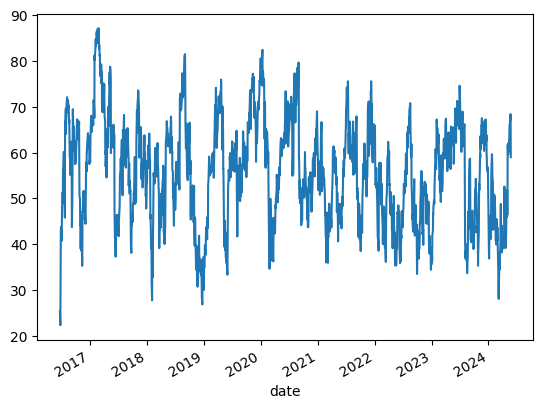

In [19]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length = 20))
df.xs('AAPL',level=1)['rsi'].plot()

In [26]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,2])
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-05-26 A         2569600.0         -0.001600        NaN       NaN   
           AAL       7222800.0         -0.000892        NaN       NaN   
           AAPL    225324800.0         -0.002114        NaN       NaN   
           ABBV      6537100.0         -0.041778        NaN       NaN   
           ABT      12446000.0         -0.007627        NaN       NaN   
...                        ...               ...        ...       ...   
2024-05-23 XYL        851800.0          0.000060  67.544388  4.878272   
           YUM       1621400.0          0.000061  47.493089  4.895983   
           ZBH       1030800.0          0.000157  36.562966  4.773616   
           ZBRA       276600.0          0.000181  62.439896  5.711922   
           ZTS       1946000.0          0.000115  54.532275  5.066273   

Price                bb_mid   bb_high  
date       ticker                      
2016-05-26 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2024-05-23 XYL     4.948036  5.017800  
           YUM     4.931679  4.967375  
           ZBH     4.796465  4.819314  
           ZBRA    5.758728  5.805534  
           ZTS     5.127832  5.189391  

[992471 rows x 11 columns]

In [28]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high = stock_data['high'],low = stock_data['low'], close = stock_data['close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-05-26 A         2569600.0         -0.001600        NaN       NaN   
           AAL       7222800.0         -0.000892        NaN       NaN   
           AAPL    225324800.0         -0.002114        NaN       NaN   
           ABBV      6537100.0         -0.041778        NaN       NaN   
           ABT      12446000.0         -0.007627        NaN       NaN   
...                        ...               ...        ...       ...   
2024-05-23 XYL        851800.0          0.000060  67.544388  4.878272   
           YUM       1621400.0          0.000061  47.493089  4.895983   
           ZBH       1030800.0          0.000157  36.562966  4.773616   
           ZBRA       276600.0          0.000181  62.439896  5.711922   
           ZTS       1946000.0          0.000115  54.532275  5.066273   

Price                bb_mid   bb_high       atr  
date       ticker                                
2016-05-26 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2024-05-23 XYL     4.948036  5.017800  0.323986  
           YUM     4.931679  4.967375  0.506872  
           ZBH     4.796465  4.819314 -0.674613  
           ZBRA    5.758728  5.805534 -0.148215  
           ZTS     5.127832  5.189391  0.726835  

[992471 rows x 12 columns]

In [30]:
def compute_macd(close):
    macd = pandas_ta.macd(close = close, length = 20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
df['macd'] = df.groupby(level=1,group_keys=False)['adj close'].apply(compute_macd)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-05-26 A         2569600.0         -0.001600        NaN       NaN   
           AAL       7222800.0         -0.000892        NaN       NaN   
           AAPL    225324800.0         -0.002114        NaN       NaN   
           ABBV      6537100.0         -0.041778        NaN       NaN   
           ABT      12446000.0         -0.007627        NaN       NaN   
...                        ...               ...        ...       ...   
2024-05-23 XYL        851800.0          0.000060  67.544388  4.878272   
           YUM       1621400.0          0.000061  47.493089  4.895983   
           ZBH       1030800.0          0.000157  36.562966  4.773616   
           ZBRA       276600.0          0.000181  62.439896  5.711922   
           ZTS       1946000.0          0.000115  54.532275  5.066273   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-05-26 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-05-23 XYL     4.948036  5.017800  0.323986  2.099372  
           YUM     4.931679  4.967375  0.506872 -0.039620  
           ZBH     4.796465  4.819314 -0.674613 -0.556311  
           ZBRA    5.758728  5.805534 -0.148215  0.922959  
           ZTS     5.127832  5.189391  0.726835  1.044958  

[992471 rows x 13 columns]

In [31]:
df['dollar_volume'] = (df['adj close'] * df['volume'])/1e6
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-26 A        42.705772   45.509998   45.599998   45.200001   45.580002   
           AAL      30.281843   31.510000   32.340000   31.370001   32.130001   
           AAPL     23.056311   25.102501   25.182501   24.660000   24.920000   
           ABBV     43.867573   61.900002   62.169998   60.900002   61.000000   
           ABT      33.566113   38.889999   38.950001   38.540001   38.650002   
...                       ...         ...         ...         ...         ...   
2024-05-23 XYL     143.720001  143.720001  145.889999  143.410004  145.889999   
           YUM     136.339996  137.009995  139.130005  136.320007  139.029999   
           ZBH     115.849998  115.849998  119.059998  115.779999  118.730003   
           ZBRA    324.059998  324.059998  328.700012  321.299988  328.700012   
           ZTS     170.899994  170.899994  172.509995  169.729996  172.020004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-05-26 A         2569600.0         -0.001600        NaN       NaN   
           AAL       7222800.0         -0.000892        NaN       NaN   
           AAPL    225324800.0         -0.002114        NaN       NaN   
           ABBV      6537100.0         -0.041778        NaN       NaN   
           ABT      12446000.0         -0.007627        NaN       NaN   
...                        ...               ...        ...       ...   
2024-05-23 XYL        851800.0          0.000060  67.544388  4.878272   
           YUM       1621400.0          0.000061  47.493089  4.895983   
           ZBH       1030800.0          0.000157  36.562966  4.773616   
           ZBRA       276600.0          0.000181  62.439896  5.711922   
           ZTS       1946000.0          0.000115  54.532275  5.066273   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-05-26 A            NaN       NaN       NaN       NaN     109.736753  
           AAL          NaN       NaN       NaN       NaN     218.719697  
           AAPL         NaN       NaN       NaN       NaN    5195.158587  
           ABBV         NaN       NaN       NaN       NaN     286.766710  
           ABT          NaN       NaN       NaN       NaN     417.763836  
...                     ...       ...       ...       ...            ...  
2024-05-23 XYL     4.948036  5.017800  0.323986  2.099372     122.420697  
           YUM     4.931679  4.967375  0.506872 -0.039620     221.061670  
           ZBH     4.796465  4.819314 -0.674613 -0.556311     119.418178  
           ZBRA    5.758728  5.805534 -0.148215  0.922959      89.634995  
           ZTS     5.127832  5.189391  0.726835  1.044958     332.571388  

[992471 rows x 14 columns]

# Aggregate to monthly level and filter our top 150 most liquid stocks per month
<li>To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency</li>